In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [158]:
pip install matplotlib==3.1.1

In [159]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [160]:
df = pd.read_excel("/content/drive/MyDrive/Assets/Kindinger data_Uploaded PlosOne.xls")
df.head()

,Unnamed: 0,Unnamed: 1,Gesational age at CL (mm),Unnamed: 3,Unnamed: 4,Unnamed: 5,,Unnamed: 7
0,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage


In [161]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Gesational age at CL (mm)', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', ' ', 'Unnamed: 7'],
      dtype='object')

In [162]:
df1=df.rename(columns={'Unnamed: 0':'Age','Unnamed: 1':'Ethnicity','Gesational age at CL (mm)':'13+0-15+6 weeks','Unnamed: 3':'16+0–18+6 weeks','Unnamed: 4':'20+0-22+6 weeks','Unnamed: 5':'Gestation at spon delivery',' ':'Preterm','Unnamed: 7':'Cerclage'})

In [163]:
df1.head()

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
0,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage


In [164]:
df1.drop(index=0,inplace=True)

In [165]:
df1.head()

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage
5,21.816667,caucasian,34,36,33,41,term,no cerclage


In [166]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 1 to 730
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         727 non-null    object
 1   Ethnicity                   727 non-null    object
 2   13+0-15+6 weeks             726 non-null    object
 3   16+0–18+6 weeks             644 non-null    object
 4   20+0-22+6 weeks             725 non-null    object
 5   Gestation at spon delivery  726 non-null    object
 6   Preterm                     725 non-null    object
 7   Cerclage                    725 non-null    object
dtypes: object(8)
memory usage: 45.8+ KB


In [167]:
df1.shape

(730, 8)

In [168]:
categorial_cols = [col for col in df1.columns if df1[col].dtype=="object"]
categorial_cols

['Age',
 'Ethnicity',
 '13+0-15+6 weeks',
 '16+0–18+6 weeks',
 '20+0-22+6 weeks',
 'Gestation at spon delivery',
 'Preterm',
 'Cerclage']

In [169]:
df1.drop_duplicates(inplace = True)

In [170]:
df1.isnull().sum()

Age                            2
Ethnicity                      2
13+0-15+6 weeks                3
16+0–18+6 weeks               85
20+0-22+6 weeks                4
Gestation at spon delivery     3
Preterm                        4
Cerclage                       4
dtype: int64

<Axes: >

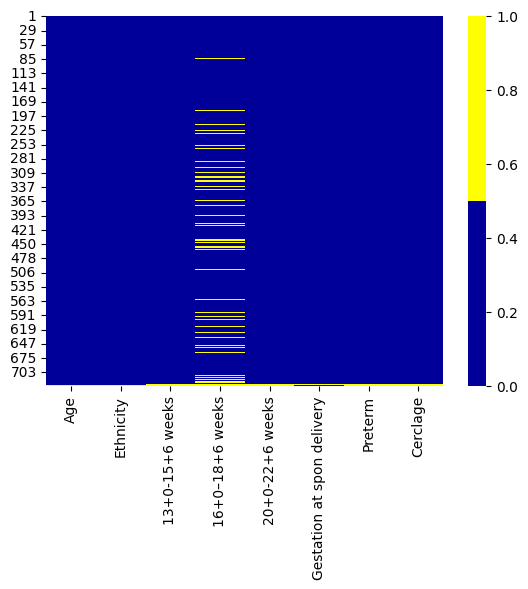

In [171]:
cols =df1.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1[cols].isnull(), cmap=sns.color_palette(colours))

In [172]:
# Here I calculate the percentage of missing data in each column.
# % of missing.
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Ethnicity - 0%
13+0-15+6 weeks - 0%
16+0–18+6 weeks - 12%
20+0-22+6 weeks - 1%
Gestation at spon delivery - 0%
Preterm - 1%
Cerclage - 1%


In [173]:
df1.shape

(727, 8)

In [174]:
df1['Ethnicity'].value_counts()

caucasian    374
asian        169
black        141
no data       39
               2
Name: Ethnicity, dtype: int64

In [175]:
df1['Age'].value_counts()

no data               37
34                    35
32                    35
36                    34
35                    34
                      ..
38.98888888888889      1
37.42777777777778      1
26.59722222222222      1
34.24444444444445      1
31.666666666666668     1
Name: Age, Length: 262, dtype: int64

In [176]:
df1.shape

(727, 8)

In [177]:
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31,31,30,41,term,no cerclage
2,20,black,33,32,32,38,term,no cerclage
3,33.338889,black,34,32,38,40,term,no cerclage
4,34.963889,caucasian,33,33,36,39,term,no cerclage
5,21.816667,caucasian,34,36,33,41,term,no cerclage
...,...,...,...,...,...,...,...,...
725,33,caucasian,31,30,29,40,term,no cerclage
726,,,,NaN,NaN,NaN,NaN,NaN
727,,,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df1.isnull().sum()

Age                            2
Ethnicity                      2
13+0-15+6 weeks                3
16+0–18+6 weeks               85
20+0-22+6 weeks                4
Gestation at spon delivery     3
Preterm                        4
Cerclage                       4
dtype: int64

In [179]:
df1.dtypes

Age                           object
Ethnicity                     object
13+0-15+6 weeks               object
16+0–18+6 weeks               object
20+0-22+6 weeks               object
Gestation at spon delivery    object
Preterm                       object
Cerclage                      object
dtype: object

In [180]:
cols = ['Age','13+0-15+6 weeks', '16+0–18+6 weeks','20+0-22+6 weeks','Gestation at spon delivery']
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [181]:
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31.0,31.0,30.0,41.0,term,no cerclage
2,20.000000,black,33.0,32.0,32.0,38.0,term,no cerclage
3,33.338889,black,34.0,32.0,38.0,40.0,term,no cerclage
4,34.963889,caucasian,33.0,33.0,36.0,39.0,term,no cerclage
5,21.816667,caucasian,34.0,36.0,33.0,41.0,term,no cerclage
...,...,...,...,...,...,...,...,...
725,33.000000,caucasian,31.0,30.0,29.0,40.0,term,no cerclage
726,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
df1.dtypes

Age                           float64
Ethnicity                      object
13+0-15+6 weeks               float64
16+0–18+6 weeks               float64
20+0-22+6 weeks               float64
Gestation at spon delivery    float64
Preterm                        object
Cerclage                       object
dtype: object

In [183]:
df1 = df1.interpolate()
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31.0,31.0,30.0,41.0,term,no cerclage
2,20.000000,black,33.0,32.0,32.0,38.0,term,no cerclage
3,33.338889,black,34.0,32.0,38.0,40.0,term,no cerclage
4,34.963889,caucasian,33.0,33.0,36.0,39.0,term,no cerclage
5,21.816667,caucasian,34.0,36.0,33.0,41.0,term,no cerclage
...,...,...,...,...,...,...,...,...
725,33.000000,caucasian,31.0,30.0,29.0,40.0,term,no cerclage
726,33.000000,,31.0,30.0,29.0,35.5,NaN,NaN
727,33.000000,,31.0,30.0,29.0,31.0,NaN,NaN
728,33.000000,NaN,31.0,30.0,29.0,26.5,NaN,NaN


In [184]:
df1.head(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,black,31.0,31.0,30.0,41.0,term,no cerclage
2,20.000000,black,33.0,32.0,32.0,38.0,term,no cerclage
3,33.338889,black,34.0,32.0,38.0,40.0,term,no cerclage
4,34.963889,caucasian,33.0,33.0,36.0,39.0,term,no cerclage
5,21.816667,caucasian,34.0,36.0,33.0,41.0,term,no cerclage
6,28.000000,black,28.0,28.0,27.0,33.0,Preterm,no cerclage
7,34.744444,caucasian,29.0,28.0,29.0,39.0,term,no cerclage
8,20.516667,black,38.0,32.0,31.0,39.0,term,no cerclage
9,34.000000,caucasian,37.0,32.0,32.0,38.0,term,no cerclage
10,34.194444,black,32.0,29.0,29.0,40.0,term,no cerclage


In [185]:
df1.tail(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
710,44.000000,asian,37.000000,38.000000,34.111111,41.0,term,no cerclage
711,38.000000,asian,32.700000,33.666667,35.666667,40.0,term,no cerclage
712,37.666667,caucasian,44.033333,43.033333,34.833333,40.0,term,no cerclage
713,37.333333,asian,22.000000,39.811111,34.000000,38.0,term,cerclage
714,37.000000,asian,38.666667,36.588889,33.166667,41.0,term,no cerclage
715,46.000000,caucasian,32.900000,33.366667,32.333333,39.0,term,no cerclage
716,35.000000,caucasian,30.500000,35.500000,37.000000,39.0,term,no cerclage
717,30.000000,caucasian,30.000000,33.333333,35.000000,34.0,Preterm,no cerclage
718,34.000000,asian,36.050000,31.166667,33.000000,40.0,term,no cerclage
719,44.000000,asian,32.333333,29.000000,31.000000,41.0,term,no cerclage


In [186]:
df1.drop_duplicates(inplace = True)

In [187]:
df1.shape

(727, 8)

In [188]:
df1.tail(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
710,44.000000,asian,37.000000,38.000000,34.111111,41.0,term,no cerclage
711,38.000000,asian,32.700000,33.666667,35.666667,40.0,term,no cerclage
712,37.666667,caucasian,44.033333,43.033333,34.833333,40.0,term,no cerclage
713,37.333333,asian,22.000000,39.811111,34.000000,38.0,term,cerclage
714,37.000000,asian,38.666667,36.588889,33.166667,41.0,term,no cerclage
715,46.000000,caucasian,32.900000,33.366667,32.333333,39.0,term,no cerclage
716,35.000000,caucasian,30.500000,35.500000,37.000000,39.0,term,no cerclage
717,30.000000,caucasian,30.000000,33.333333,35.000000,34.0,Preterm,no cerclage
718,34.000000,asian,36.050000,31.166667,33.000000,40.0,term,no cerclage
719,44.000000,asian,32.333333,29.000000,31.000000,41.0,term,no cerclage


In [189]:
df1.isnull().sum()

Age                           0
Ethnicity                     2
13+0-15+6 weeks               0
16+0–18+6 weeks               0
20+0-22+6 weeks               0
Gestation at spon delivery    0
Preterm                       4
Cerclage                      4
dtype: int64

In [190]:
df1=df1.dropna()

In [191]:
df1.shape

(723, 8)

In [192]:
df1.isnull().sum()

Age                           0
Ethnicity                     0
13+0-15+6 weeks               0
16+0–18+6 weeks               0
20+0-22+6 weeks               0
Gestation at spon delivery    0
Preterm                       0
Cerclage                      0
dtype: int64

In [193]:
df1.tail(20)

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
706,42.000000,black,40.333333,38.333333,34.333333,39.0,term,no cerclage
707,34.000000,asian,39.333333,38.333333,41.000000,39.0,term,no cerclage
708,37.000000,caucasian,30.566667,30.333333,31.000000,40.0,term,no cerclage
709,40.500000,caucasian,31.000000,34.166667,32.555556,39.0,term,no cerclage
710,44.000000,asian,37.000000,38.000000,34.111111,41.0,term,no cerclage
711,38.000000,asian,32.700000,33.666667,35.666667,40.0,term,no cerclage
712,37.666667,caucasian,44.033333,43.033333,34.833333,40.0,term,no cerclage
713,37.333333,asian,22.000000,39.811111,34.000000,38.0,term,cerclage
714,37.000000,asian,38.666667,36.588889,33.166667,41.0,term,no cerclage
715,46.000000,caucasian,32.900000,33.366667,32.333333,39.0,term,no cerclage


In [194]:
df1['Ethnicity'].value_counts()

caucasian    374
asian        169
black        141
no data       39
Name: Ethnicity, dtype: int64

In [195]:
index_names = df1[ df1['Ethnicity'] == 'no data' ].index

In [196]:
index_names

Int64Index([466, 479, 496, 513, 529, 530, 533, 534, 560, 565, 568, 569, 575,
            580, 581, 582, 586, 587, 595, 598, 601, 602, 604, 607, 608, 611,
            612, 615, 620, 622, 624, 629, 630, 640, 691, 692, 695, 696, 722],
           dtype='int64')

In [197]:
df1.drop(index_names, inplace = True)

<ipython-input-197-2d9ff363ced4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index_names, inplace = True)


In [198]:
df1.shape

(684, 8)

In [199]:
df1['Ethnicity'].value_counts()

caucasian    374
asian        169
black        141
Name: Ethnicity, dtype: int64

In [200]:
df1['Preterm'].value_counts()

term       613
Preterm     71
Name: Preterm, dtype: int64

In [201]:
df1['Cerclage'].value_counts()

no cerclage    590
cerclage        94
Name: Cerclage, dtype: int64

In [202]:
df1= df1.replace(['caucasian','asian','black'],[0,1,2])

In [203]:
df1= df1.replace(['term','Preterm'],[0,1])

In [204]:
df1= df1.replace(['no cerclage','cerclage'],[0,1])

<Axes: >

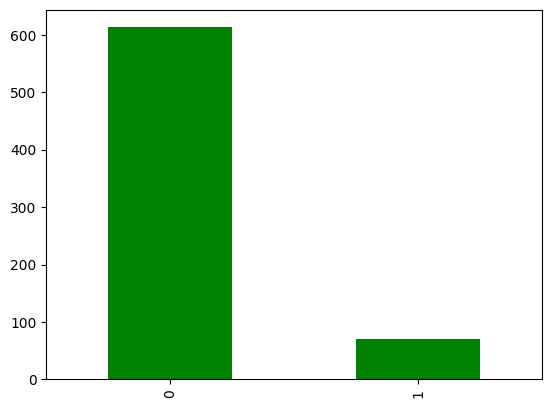

In [205]:
df1['Preterm'].value_counts().plot.bar(color='green')

<Axes: >

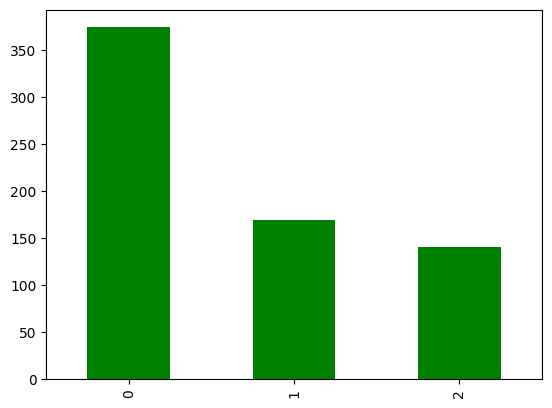

In [206]:
df1['Ethnicity'].value_counts().plot.bar(color='green')

<Axes: >

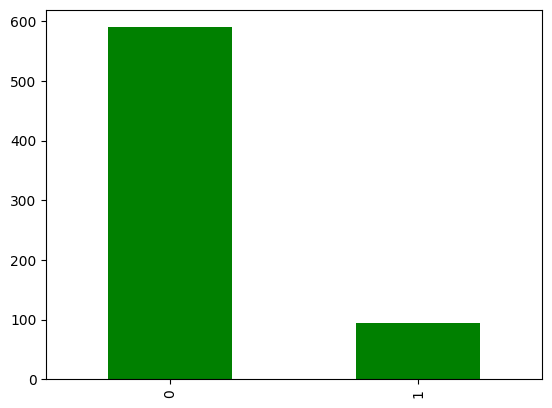

In [207]:
df1['Cerclage'].value_counts().plot.bar(color='green')

In [208]:
df1

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Preterm,Cerclage
1,40.688889,2,31.000000,31.00,30.000000,41.0,0,0
2,20.000000,2,33.000000,32.00,32.000000,38.0,0,0
3,33.338889,2,34.000000,32.00,38.000000,40.0,0,0
4,34.963889,0,33.000000,33.00,36.000000,39.0,0,0
5,21.816667,0,34.000000,36.00,33.000000,41.0,0,0
...,...,...,...,...,...,...,...,...
720,39.500000,0,31.500000,30.50,26.666667,41.0,0,0
721,35.000000,0,35.333333,32.25,30.350000,42.0,0,0
723,34.000000,0,17.000000,33.50,35.516667,39.0,0,1
724,36.000000,0,31.000000,33.00,37.000000,40.0,0,0


**Train Test Split**

In [209]:
y = df1['Preterm']
X = df1.drop(columns = 'Preterm')

In [210]:
df1['Preterm'].value_counts()

0    613
1     71
Name: Preterm, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

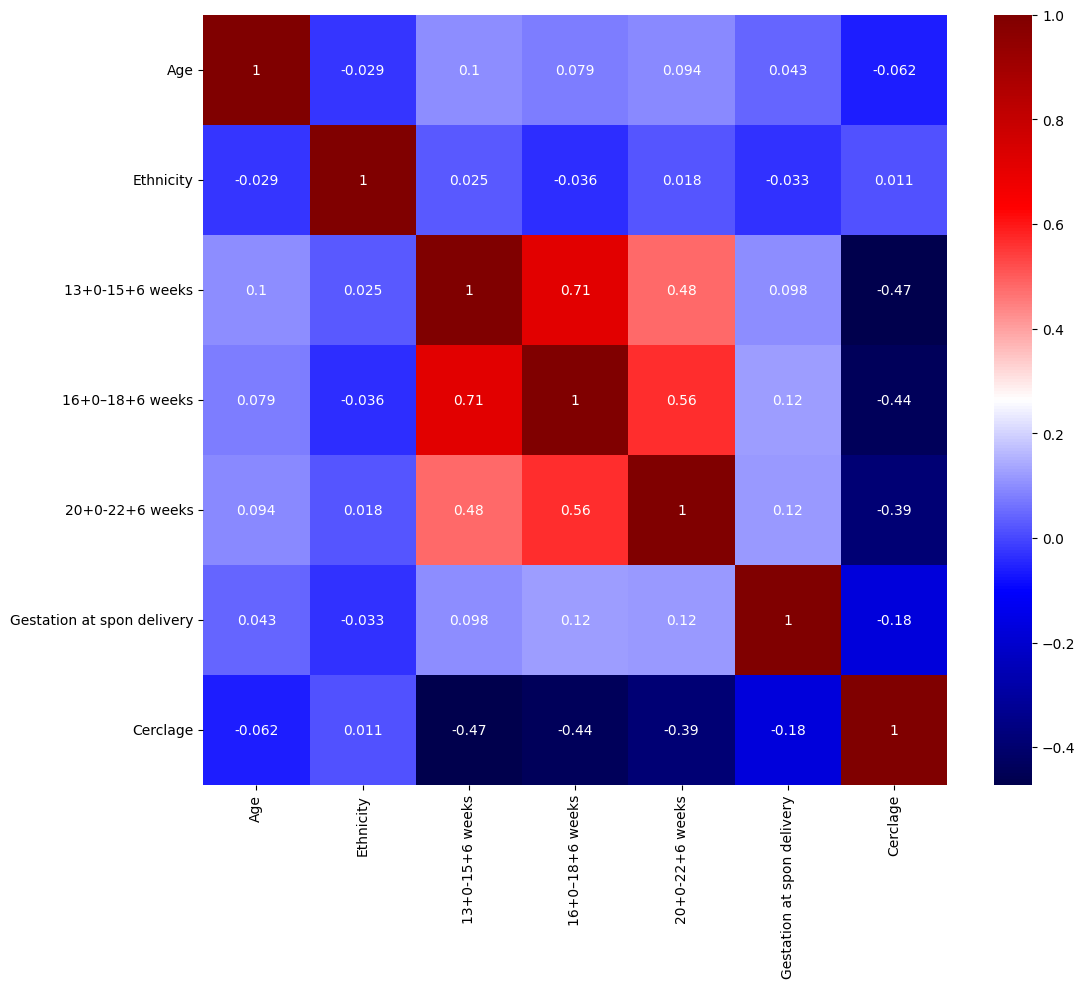

In [212]:
corr = X_train.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

**Min Max Scaling**

In [213]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Age', 'Ethnicity', '13+0-15+6 weeks', '16+0–18+6 weeks', '20+0-22+6 weeks', 'Gestation at spon delivery']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [214]:
X_train.head()

,Age,Ethnicity,13+0-15+6 weeks,16+0–18+6 weeks,20+0-22+6 weeks,Gestation at spon delivery,Cerclage
272,0.501190,0.5,0.356008,0.412529,0.525000,0.823529,0
434,0.209921,0.5,0.381437,0.412529,0.600000,0.647059,0
331,0.714286,1.0,0.635728,0.618793,0.750000,0.882353,0
659,0.208829,0.0,0.339055,0.397250,0.733333,0.823529,0
561,0.500000,0.0,0.725577,1.000000,0.866667,0.705882,0


**ZeroR**
W/O Hyper Tun

In [215]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 10)

In [216]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=10, strategy='most_frequent')

In [217]:
zeroRTestAccuracy=dummy_clf.score(X_test,y_test)
zeroRTrainAccuracy=dummy_clf.score(X_train,y_train)
print(zeroRTestAccuracy)
print(zeroRTrainAccuracy)

0.8978102189781022
0.8957952468007313


**ROC AUC before hyper parameter tuning**

In [218]:
# Test
zr_probs = dummy_clf.predict_proba(X_test)
zr_probs = zr_probs[:, 1]
zr_auc = roc_auc_score(y_test, zr_probs)
print('Without Hyper Tuning Logistic: ROC AUC Test=%.3f' % (zr_auc))
# calculate roc curves
zr_fpr, zr_tpr, _ = roc_curve(y_test, zr_probs)

# Train
zr_probsTrain = dummy_clf.predict_proba(X_train)
zr_probsTrain = zr_probsTrain[:, 1]
zr_aucTrain = roc_auc_score(y_train, zr_probsTrain)
print('Without Hyper Tuning Logistic: ROC AUC Train=%.3f' % (zr_aucTrain))

Without Hyper Tuning Logistic: ROC AUC Test=0.500
Without Hyper Tuning Logistic: ROC AUC Train=0.500


In [219]:
from sklearn.metrics import confusion_matrix
print("Test without hyper parameter tuning - ZeroR")
ZeroRpred=dummy_clf.predict(X_test)
confusion_matrixZR = confusion_matrix(y_test,ZeroRpred)
print(confusion_matrixZR)

print("Train without hyper parameter tuning - ZeroR")
ZeroRpredTrain=dummy_clf.predict(X_train)
confusion_matrixZRTrain = confusion_matrix(y_train, ZeroRpredTrain)
print(confusion_matrixZRTrain)

Test without hyper parameter tuning - ZeroR
[[123   0]
 [ 14   0]]
Train without hyper parameter tuning - ZeroR
[[490   0]
 [ 57   0]]


In [220]:
from sklearn.model_selection import GridSearchCV

strategy = ["most_frequent", "prior", "stratified", "uniform"]

random_state = [0]

# Create the random grid
param_grid_ZR = {'strategy': strategy, 'random_state': random_state}
print(param_grid_ZR)

{'strategy': ['most_frequent', 'prior', 'stratified', 'uniform'], 'random_state': [0]}


In [221]:
dummy_clf_hyper = DummyClassifier()
dummy_clf_grid_cv = GridSearchCV(estimator=dummy_clf_hyper, param_grid=param_grid_ZR, cv=10, n_jobs=-1, verbose=2)
dummy_clf_grid_cv.fit(X_train, y_train)
best_dummy_grid = dummy_clf_grid_cv.best_estimator_
best_dummy_grid

Fitting 10 folds for each of 4 candidates, totalling 40 fits


DummyClassifier(random_state=0, strategy='most_frequent')

In [222]:
dummy_clf_hyper = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf_hyper.fit(X_train, y_train)
ZRHypeTestAccuracy = dummy_clf_hyper.score(X_test, y_test)
ZRHypeTrainAccuracy = dummy_clf_hyper.score(X_train, y_train)
print(ZRHypeTestAccuracy)
print(ZRHypeTrainAccuracy)

0.8978102189781022
0.8957952468007313


**ROC AUC after hyper parameter tuning**

In [223]:
# Test
zr_probs_af = dummy_clf_hyper.predict_proba(X_test)
zr_probs_af = zr_probs_af[:, 1]
zr_auc_af = roc_auc_score(y_test, zr_probs_af)
print('With Hyper Tuning Logistic: ROC AUC Test=%.3f' % (zr_auc_af))
# calculate roc curves
zr_fpr_af, zr_tpr_af, _af = roc_curve(y_test, zr_probs_af)

# Train
zr_probsTrain = dummy_clf_hyper.predict_proba(X_train)
zr_probsTrain = zr_probsTrain[:, 1]
zr_aucTrain_af = roc_auc_score(y_train, zr_probsTrain)
print('With Hyper Tuning Logistic: ROC AUC Train=%.3f' % (zr_aucTrain_af))

With Hyper Tuning Logistic: ROC AUC Test=0.500
With Hyper Tuning Logistic: ROC AUC Train=0.500


**Confusion Matrix with Tuning**





In [224]:
print("Test with hyper parameter tuning - ZeroR")
ZeroRpredHyper=dummy_clf_hyper.predict(X_test)
confusion_matrixZR = confusion_matrix(y_test,ZeroRpredHyper)
print(confusion_matrixZR)

print("Train with hyper parameter tuning - ZeroR")
ZeroRpredTrainHyper=dummy_clf_hyper.predict(X_train)
confusion_matrixZRTrain = confusion_matrix(y_train, ZeroRpredTrainHyper)
print(confusion_matrixZRTrain)

Test with hyper parameter tuning - ZeroR
[[123   0]
 [ 14   0]]
Train with hyper parameter tuning - ZeroR
[[490   0]
 [ 57   0]]


**Logistic Regression**

W/O Hyper Tun



In [225]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear',random_state=500)

In [226]:
xtrain=np.array(X_train)
ytrain=np.array(y_train)
logreg.fit(xtrain,ytrain.reshape(-1,))

LogisticRegression(random_state=500, solver='liblinear')

In [227]:
logisticTestAccuracy=logreg.score(X_test,y_test)
logisticTrainAccuracy=logreg.score(X_train,y_train)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)

0.9197080291970803
0.9085923217550275


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [228]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Test
lr_probs = logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Without Hyper Tuning Logistic: Logistic Regression ROC AUC Test=%.3f' % (lr_auc))


# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


# Train
lr_probs = logreg.predict_proba(X_train)
lr_probs = lr_probs[:, 1]
lr_auc_tr = roc_auc_score(y_train, lr_probs)
print('Without Hyper Tuning Logistic: Logistic Regression ROC AUC Train=%.3f' % (lr_auc_tr))

Without Hyper Tuning Logistic: Logistic Regression ROC AUC Test=0.975
Without Hyper Tuning Logistic: Logistic Regression ROC AUC Train=0.979


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [229]:
from sklearn.metrics import confusion_matrix

print("Test without hyper parameter tuning - Logistic Regression")
Logpred = logreg.predict(X_test)
confusion_matrixLR = confusion_matrix(y_test, Logpred)
print(confusion_matrixLR)

print("Train without hyper parameter tuning - Logistic Regression")
LogpredTrain = logreg.predict(X_train)
confusion_matrixLR_train = confusion_matrix(y_train, LogpredTrain)
print(confusion_matrixLR_train)

Test without hyper parameter tuning - Logistic Regression
[[123   0]
 [ 11   3]]
Train without hyper parameter tuning - Logistic Regression
[[490   0]
 [ 50   7]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**W/ Hyper Tun**

In [230]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid_LogReg = {'solver': solvers, 'penalty': penalty, 'C':c_values}
print(param_grid_LogReg)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}


In [231]:
logreg_hyper = LogisticRegression()
logreg_grid_cv = GridSearchCV(estimator=logreg_hyper, param_grid=param_grid_LogReg, cv=10, n_jobs=-1, verbose=2)

logreg_grid_cv.fit(xtrain,ytrain.reshape(-1,))
best_log_reg_grid = logreg_grid_cv.best_estimator_
best_log_reg_grid

Fitting 10 folds for each of 25 candidates, totalling 250 fits


LogisticRegression(C=100, solver='newton-cg')

In [232]:
logreg_hyper = LogisticRegression(C=100, solver='newton-cg')
logreg_hyper.fit(X_train,y_train)
logisticTestHyperAccuracy=logreg_hyper.score(X_test,y_test)
logisticTrainHyperAccuracy=logreg_hyper.score(X_train,y_train)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)

0.9197080291970803
0.9085923217550275


In [233]:
# Test
lr_probs_af = logreg_hyper.predict_proba(X_test)
lr_probs_af = lr_probs_af[:, 1]
lr_auc_af = roc_auc_score(y_test, lr_probs_af)
print('With Hyper Tuning Logistic: Logistic Regression ROC AUC Test=%.3f' % (lr_auc_af))


# calculate roc curves
lr_fpr_af, lr_tpr_af, _af = roc_curve(y_test, lr_probs_af)


# Train
lr_probs_tr_af = logreg_hyper.predict_proba(X_train)
lr_probs_tr_af = lr_probs_tr_af[:, 1]
lr_auc_tr_af = roc_auc_score(y_train, lr_probs_tr_af)
print('With Hyper Tuning Logistic: Logistic Regression ROC AUC Train=%.3f' % (lr_auc_tr_af))

With Hyper Tuning Logistic: Logistic Regression ROC AUC Test=0.997
With Hyper Tuning Logistic: Logistic Regression ROC AUC Train=1.000


In [234]:
print("Test with hyper parameter tuning - Logistic Regression")
LogpredHyper = logreg_hyper.predict(X_test)
confusion_matrixLR = confusion_matrix(y_test, Logpred)
print(confusion_matrixLR)

print("Train with hyper parameter tuning - Logistic Regression")
LogpredTrainHyper = logreg_hyper.predict(X_train)
confusion_matrixLR_train = confusion_matrix(y_train, LogpredTrainHyper)
print(confusion_matrixLR_train)

Test with hyper parameter tuning - Logistic Regression
[[123   0]
 [ 11   3]]
Train with hyper parameter tuning - Logistic Regression
[[490   0]
 [  2  55]]


**Random Forest**

W/O Hyper Tun

In [86]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=2)

In [87]:
random.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=2)

In [88]:
randomTestAccuracy=random.score(X_test,y_test)
randomTrainAccuracy=random.score(X_train,y_train)
print(randomTestAccuracy)
print(randomTrainAccuracy)

1.0
0.9981718464351006


In [89]:
# Test
rf_probs = random.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Without Hyper Tuning Logistic: Random Forest ROC AUC Test=%.3f' % (rf_auc))

# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Train
rf_probs = random.predict_proba(X_train)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_train, rf_probs)
print('Without Hyper Tuning Logistic: Random Forest ROC AUC Train=%.3f' % (rf_auc))

Without Hyper Tuning Logistic: Random Forest ROC AUC Test=1.000
Without Hyper Tuning Logistic: Random Forest ROC AUC Train=1.000


In [90]:
print("Test without hyper parameter tuning - Random Forest")
Randompred = random.predict(X_test)
confusion_matrixRF = confusion_matrix(y_test, Randompred)
print(confusion_matrixRF)

print("Train without hyper parameter tuning - Random Forest")
RandompredTrain = random.predict(X_train)
confusion_matrixRF_train = confusion_matrix(y_train, RandompredTrain)
print(confusion_matrixRF_train)

Test without hyper parameter tuning - Random Forest
[[123   0]
 [  0  14]]
Train without hyper parameter tuning - Random Forest
[[490   0]
 [  1  56]]


**W/ Hyper Tun**

In [95]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)] # Less
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000, 10)] # Less
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
param_grid_random_ff = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param_grid_random_ff)

{'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [97]:
random_forest_hyper = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)
random_forest_hyper.fit(X_train,y_train.ravel())

randomTestHyperAccuracy=random_forest_hyper.score(X_test,y_test)
randomTrainHyperAccuracy=random_forest_hyper.score(X_train,y_train)
print(randomTestHyperAccuracy)
print(randomTrainHyperAccuracy)

1.0
1.0


In [98]:
# Test
rf_probs_af = random_forest_hyper.predict_proba(X_test)
rf_probs_af = rf_probs_af[:, 1]
rf_auc_af = roc_auc_score(y_test, rf_probs_af)
print('With Hyper Tuning Logistic: Random Forest ROC AUC Test=%.3f' % (rf_auc_af))


# calculate roc curves
rf_fpr_af, rf_tpr_af, _af = roc_curve(y_test, rf_probs_af)


# Train
rf_probs_tr_af = random_forest_hyper.predict_proba(X_train)
rf_probs_tr_af = rf_probs_tr_af[:, 1]
rf_auc_tr_af = roc_auc_score(y_train, rf_probs_tr_af)
print('With Hyper Tuning Logistic: Random Forest ROC AUC Train=%.3f' % (rf_auc_tr_af))

With Hyper Tuning Logistic: Random Forest ROC AUC Test=1.000
With Hyper Tuning Logistic: Random Forest ROC AUC Train=1.000


In [99]:
print("Test with hyper parameter tuning - Random Forest")
RandompredHyper = random_forest_hyper.predict(X_test)
confusion_matrixRF = confusion_matrix(y_test, RandompredHyper)
print(confusion_matrixRF)

print("Train with hyper parameter tuning - Random Forest")
RandompredTrainHyper = random_forest_hyper.predict(X_train)
confusion_matrixRF_train = confusion_matrix(y_train, RandompredTrainHyper)
print(confusion_matrixRF_train)

Test with hyper parameter tuning - Random Forest
[[123   0]
 [  0  14]]
Train with hyper parameter tuning - Random Forest
[[490   0]
 [  0  57]]


**Naive Bayes**

W/O Hyper Tun

In [100]:
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()

In [101]:
gNB.fit(X_train,y_train.ravel())

GaussianNB()

In [102]:
gNBtestAccuracy=gNB.score(X_test,y_test)
gNBtrainAccuracy=gNB.score(X_train,y_train)
print(gNBtestAccuracy)
print(gNBtrainAccuracy)

0.8905109489051095
0.9506398537477148


In [103]:
# Test
nb_probs = gNB.predict_proba(X_test)
nb_probs = nb_probs[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)
print('Without Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Test=%.3f' % (nb_auc))

# calculate roc curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# Train
nb_probs = gNB.predict_proba(X_train)
nb_probs = nb_probs[:, 1]
nb_auc = roc_auc_score(y_train, nb_probs)
print('Without Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Train=%.3f' % (nb_auc))

Without Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Test=0.958
Without Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Train=0.979


In [104]:
print("Test without hyper parameter tuning - Gaussian Naive Bayes")
gNBpred = gNB.predict(X_test)
confusion_matrixGNB = confusion_matrix(y_test, gNBpred)
print(confusion_matrixGNB)

print("Train without hyper parameter tuning - Gaussian Naive Bayes")
gNBpredTrain = gNB.predict(X_train)
confusion_matrixGNB_train = confusion_matrix(y_train, gNBpredTrain)
print(confusion_matrixGNB_train)

Test without hyper parameter tuning - Gaussian Naive Bayes
[[112  11]
 [  4  10]]
Train without hyper parameter tuning - Gaussian Naive Bayes
[[472  18]
 [  9  48]]


In [152]:
gNB_hyper = GaussianNB()

param_grid_gNB = {'var_smoothing': np.logspace(0,-9, num=100)}
gNB_grid_cv = GridSearchCV(estimator=gNB_hyper, param_grid=param_grid_gNB, cv=10,n_jobs=-1,verbose=2)
gNB_grid_cv.fit(X_train, y_train.ravel())

gNB_grid_cv.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.0003511191734215131}

**W/ Hyper Tun**

In [105]:
gNB_hyper = GaussianNB()

param_grid_gNB = {'var_smoothing': np.logspace(0,-9, num=100)}
gNB_grid_cv = GridSearchCV(estimator=gNB_hyper, param_grid=param_grid_gNB, cv=10,n_jobs=-1,verbose=2)
gNB_grid_cv.fit(X_train, y_train.ravel())

gNB_grid_cv.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.0003511191734215131}

In [106]:
gNB_hyper = GaussianNB(var_smoothing=0.0003511191734215131)
gNB_hyper.fit(X_train, y_train)

gNBtestHyperAccuracy=gNB_hyper.score(X_test,y_test)
gNBtrainHyperAccuracy=gNB_hyper.score(X_train,y_train)
print(gNBtestHyperAccuracy)
print(gNBtrainHyperAccuracy)

0.8905109489051095
0.9506398537477148


In [107]:
# Test
nb_probs_af = gNB_hyper.predict_proba(X_test)
nb_probs_af = nb_probs_af[:, 1]
nb_auc_af = roc_auc_score(y_test, nb_probs_af)
print('With Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Test=%.3f' % (nb_auc_af))

# calculate roc curves
nb_fpr_af, nb_tpr_af, _af = roc_curve(y_test, nb_probs_af)

# Train
nb_probs_tr_af = gNB_hyper.predict_proba(X_train)
nb_probs_tr_af = nb_probs_tr_af[:, 1]
nb_auc_tr_af = roc_auc_score(y_train, nb_probs_tr_af)
print('With Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Train=%.3f' % (nb_auc_tr_af))

With Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Test=0.958
With Hyper Tuning Logistic: Gaussian Naive Bayes ROC AUC Train=0.979


In [108]:
print("Test with hyper parameter tuning - Gaussian Naive Bayes")
gNBpredHyper = gNB_hyper.predict(X_test)
confusion_matrixGNB = confusion_matrix(y_test, gNBpredHyper)
print(confusion_matrixGNB)

print("Train with hyper parameter tuning - Gaussian Naive Bayes")
gNBpredTrainHyper = gNB_hyper.predict(X_train)
confusion_matrixGNB_train = confusion_matrix(y_train, gNBpredTrainHyper)
print(confusion_matrixGNB_train)

Test with hyper parameter tuning - Gaussian Naive Bayes
[[112  11]
 [  4  10]]
Train with hyper parameter tuning - Gaussian Naive Bayes
[[472  18]
 [  9  48]]


**SVM**

W/O Hyper Tun

In [110]:
from sklearn.svm import SVC
svm=SVC(probability=True,kernel='linear')

In [111]:
svm.fit(X_train,y_train.ravel())

SVC(kernel='linear', probability=True)

In [112]:
svmTestAccuracy=svm.score(X_test,y_test)
svmTrainAccuracy=svm.score(X_train,y_train)
print(svmTestAccuracy)
print(svmTrainAccuracy)

0.948905109489051
0.9506398537477148


In [113]:
# Test
sb_probs = svm.predict_proba(X_test)
sb_probs = sb_probs[:, 1]
sb_auc = roc_auc_score(y_test, sb_probs)
print('Without Hyper Tuning Logistic: SVM ROC AUC Test=%.3f' % (sb_auc))

# calculate roc curves
sb_fpr, sb_tpr, _ = roc_curve(y_test, sb_probs)

# Train
sb_probs = svm.predict_proba(X_train)
sb_probs = sb_probs[:, 1]
sb_auc = roc_auc_score(y_train, sb_probs)
print('Without Hyper Tuning Logistic: SVM ROC AUC Train=%.3f' % (sb_auc))

Without Hyper Tuning Logistic: SVM ROC AUC Test=0.990
Without Hyper Tuning Logistic: SVM ROC AUC Train=0.997


In [114]:
print("Test without hyper parameter tuning - SVM")
SVMpred = svm.predict(X_test)
confusion_matrixSVM = confusion_matrix(y_test, SVMpred)
print(confusion_matrixSVM)

print("Train without hyper parameter tuning - SVM")
SVMpredTrain = svm.predict(X_train)
confusion_matrixSVM_train = confusion_matrix(y_train, SVMpredTrain)
print(confusion_matrixSVM_train)

Test without hyper parameter tuning - SVM
[[123   0]
 [  7   7]]
Train without hyper parameter tuning - SVM
[[490   0]
 [ 27  30]]


In [115]:
# https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
svm_hyper = SVC()
param_grid_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svm_grid_cv = GridSearchCV(estimator=svm_hyper, param_grid=param_grid_svm,cv=10, refit=True, verbose=2)
svm_grid_cv.fit(X_train,y_train.ravel())

svm_grid_cv.best_params_

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

**W/ Hyper Tun**

In [116]:
svm_hyper = SVC(C=100, gamma=1, kernel= 'linear', probability=True)
svm_hyper.fit(X_train,y_train)

svmTestHyperAccuracy=svm_hyper.score(X_test,y_test)
svmTrainHyperAccuracy=svm_hyper.score(X_train,y_train)
print(svmTestHyperAccuracy)
print(svmTrainHyperAccuracy)

1.0
0.9981718464351006


In [117]:
# Test
sb_probs_af = svm_hyper.predict_proba(X_test)
sb_probs_af = sb_probs_af[:, 1]
sb_auc_af = roc_auc_score(y_test, sb_probs_af)
print('With Hyper Tuning Logistic: SVM ROC AUC Test=%.3f' % (sb_auc_af))

# calculate roc curves
sb_fpr_af, sb_tpr_af, _af = roc_curve(y_test, sb_probs_af)

# Train
sb_probs_tr_af = svm_hyper.predict_proba(X_train)
sb_probs_tr_af = sb_probs_tr_af[:, 1]
sb_auc_tr_af = roc_auc_score(y_train, sb_probs_tr_af)
print('With Hyper Tuning Logistic: SVM ROC AUC Train=%.3f' % (sb_auc_tr_af))

With Hyper Tuning Logistic: SVM ROC AUC Test=1.000
With Hyper Tuning Logistic: SVM ROC AUC Train=1.000


In [118]:
print("Test with hyper parameter tuning - SVM")
SVMpredHyper = svm_hyper.predict(X_test)
confusion_matrixSVM = confusion_matrix(y_test, SVMpredHyper)
print(confusion_matrixSVM)

print("Train with hyper parameter tuning - SVM")
SVMpredTrainHyper = svm_hyper.predict(X_train)
confusion_matrixSVM_train = confusion_matrix(y_train, SVMpredTrainHyper)
print(confusion_matrixSVM_train)

Test with hyper parameter tuning - SVM
[[123   0]
 [  0  14]]
Train with hyper parameter tuning - SVM
[[490   0]
 [  1  56]]


**K Nearest Neighbour**

W/O Hyper Tun

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=10)

In [121]:
knTestAccuracy=neigh.score(X_test,y_test)
knTrainAccuracy=neigh.score(X_train,y_train)
print(knTestAccuracy)
print(knTrainAccuracy)

0.927007299270073
0.923217550274223


In [122]:
KNNpred=neigh.predict(X_test)

In [123]:
# Test
knn_probs = neigh.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
print('Without Hyper Tuning Logistic: KNN ROC AUC Test=%.3f' % (knn_auc))

# calculate roc curves
kn_fpr, kn_tpr, _ = roc_curve(y_test, knn_probs)

# Train
knn_probs = neigh.predict_proba(X_train)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_train, knn_probs)
print('Without Hyper Tuning Logistic: KNN ROC AUC Train=%.3f' % (knn_auc))

Without Hyper Tuning Logistic: KNN ROC AUC Test=0.978
Without Hyper Tuning Logistic: KNN ROC AUC Train=0.974


In [124]:
print("Test without hyper parameter tuning - KNN")
KNNpred = neigh.predict(X_test)
confusion_matrixKNN = confusion_matrix(y_test, KNNpred)
print(confusion_matrixKNN)

print("Train without hyper parameter tuning - KNN")
KNNpredTrain = neigh.predict(X_train)
confusion_matrixKNN_train = confusion_matrix(y_train, KNNpredTrain)
print(confusion_matrixKNN_train)

Test without hyper parameter tuning - KNN
[[123   0]
 [ 10   4]]
Train without hyper parameter tuning - KNN
[[490   0]
 [ 42  15]]


In [236]:
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
knn_hyper = KNeighborsClassifier()

leaf_size = list(range(1, 25))
n_neighbors = list(range(1, 15))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
p = [1, 2]

param_grid_knn = {'leaf_size': leaf_size, 'n_neighbors': n_neighbors, 'algorithm': algorithm, 'weights': weights, 'p': p}

knn_grid_cv = GridSearchCV(estimator=knn_hyper, param_grid=param_grid_knn, cv=10, n_jobs=-1, verbose=2)
knn_grid_cv.fit(X_train,y_train.ravel())

knn_grid_cv.best_params_

Fitting 10 folds for each of 5376 candidates, totalling 53760 fits


{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

W/ Hyper Tun

In [238]:
knn_hyper = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=5, p=2, weights='uniform')

knn_hyper.fit(X_train, y_train.ravel())

knHyperTestAccuracy=knn_hyper.score(X_test,y_test)
knHyperTrainAccuracy=knn_hyper.score(X_train,y_train)
print(knHyperTestAccuracy)
print(knHyperTrainAccuracy)

0.9635036496350365
0.946983546617916


In [239]:
# Test
knn_probs_af = knn_hyper.predict_proba(X_test)
knn_probs_af = knn_probs_af[:, 1]
knn_auc_af = roc_auc_score(y_test, knn_probs_af)
print('With Hyper Tuning Logistic: KNN ROC AUC Test=%.3f' % (knn_auc_af))

# calculate roc curves
kn_fpr_af, kn_tpr_af, _af = roc_curve(y_test, knn_probs_af)

# Train
knn_probs_tr_af = knn_hyper.predict_proba(X_train)
knn_probs_tr_af = knn_probs_tr_af[:, 1]
knn_auc_tr_af = roc_auc_score(y_train, knn_probs_tr_af)
print('With Hyper Tuning Logistic: KNN ROC AUC Train=%.3f' % (knn_auc_tr_af))

With Hyper Tuning Logistic: KNN ROC AUC Test=0.914
With Hyper Tuning Logistic: KNN ROC AUC Train=0.986


In [240]:
print("Test with hyper parameter tuning - KNN")
KNNpredHyper = knn_hyper.predict(X_test)
confusion_matrixKNN = confusion_matrix(y_test, KNNpredHyper)
print(confusion_matrixKNN)

print("Train with hyper parameter tuning - KNN")
KNNpredTrainHyper = knn_hyper.predict(X_train)
confusion_matrixKNN_train = confusion_matrix(y_train, KNNpredTrainHyper)
print(confusion_matrixKNN_train)

Test with hyper parameter tuning - KNN
[[123   0]
 [  5   9]]
Train with hyper parameter tuning - KNN
[[489   1]
 [ 28  29]]


**Decision Tree Classifier**

W/O Hyper Tun

In [241]:
from sklearn import tree

In [242]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=2)
dtc.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=2, splitter='random')

In [243]:
dtcTestAccuracy=dtc.score(X_test,y_test)
dtcTrainAccuracy=dtc.score(X_train,y_train)
print(dtcTestAccuracy)
print(dtcTrainAccuracy)

0.9197080291970803
0.9012797074954296


In [244]:
DTCpred=dtc.predict(X_test)

In [245]:
# Test
dtc_probs = dtc.predict_proba(X_test)
dtc_probs = dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_probs)
print('Without Hyper Tuning Logistic: DT ROC AUC Test=%.3f' % (dtc_auc))

# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)

# Train
dtc_probs = dtc.predict_proba(X_train)
dtc_probs = dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_train, dtc_probs)
print('Without Hyper Tuning Logistic: DT ROC AUC Train=%.3f' % (dtc_auc))

Without Hyper Tuning Logistic: DT ROC AUC Test=0.965
Without Hyper Tuning Logistic: DT ROC AUC Train=0.906


In [246]:
print("Test without hyper parameter tuning - DT")
DTpred = dtc.predict(X_test)
confusion_matrixDT = confusion_matrix(y_test, DTpred)
print(confusion_matrixDT)

print("Train without hyper parameter tuning - DT")
DTpredTrain = dtc.predict(X_train)
confusion_matrixDT_train = confusion_matrix(y_train, DTpredTrain)
print(confusion_matrixDT_train)

Test without hyper parameter tuning - DT
[[123   0]
 [ 11   3]]
Train without hyper parameter tuning - DT
[[490   0]
 [ 54   3]]


**W/ Hyper Tun**

In [247]:
dtc_hyper = tree.DecisionTreeClassifier(criterion='gini', max_features='auto', max_leaf_nodes=15, min_samples_split=3, splitter='best')

dtc_hyper.fit(X_train, y_train.ravel())

dtcHyperTestAccuracy=dtc_hyper.score(X_test,y_test)
dtcHyperTrainAccuracy=dtc_hyper.score(X_train,y_train)
print(dtcHyperTestAccuracy)
print(dtcHyperTrainAccuracy)

1.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [248]:
# Test
dtc_probs_af = dtc_hyper.predict_proba(X_test)
dtc_probs_af = dtc_probs_af[:, 1]
dtc_auc_af = roc_auc_score(y_test, dtc_probs_af)
print('With Hyper Tuning Logistic: DT ROC AUC Test=%.3f' % (dtc_auc))

# calculate roc curves
dtc_fpr_af, dtc_tpr_af, _af = roc_curve(y_test, dtc_probs_af)

# Train
dtc_probs_tr_af = dtc_hyper.predict_proba(X_train)
dtc_probs_tr_af = dtc_probs_tr_af[:, 1]
dtc_auc_tr_af = roc_auc_score(y_train, dtc_probs_tr_af)
print('With Hyper Tuning Logistic: DT ROC AUC Train=%.3f' % (dtc_auc_tr_af))

With Hyper Tuning Logistic: DT ROC AUC Test=0.906
With Hyper Tuning Logistic: DT ROC AUC Train=1.000


In [249]:
print("Test with hyper parameter tuning - DT")
DTpredHyper = dtc_hyper.predict(X_test)
confusion_matrixDT = confusion_matrix(y_test, DTpredHyper)
print(confusion_matrixDT)

print("Train with hyper parameter tuning - DT")
DTpredTrainHyper = dtc_hyper.predict(X_train)
confusion_matrixDT_train = confusion_matrix(y_train, DTpredTrainHyper)
print(confusion_matrixDT_train)

Test with hyper parameter tuning - DT
[[123   0]
 [  0  14]]
Train with hyper parameter tuning - DT
[[490   0]
 [  0  57]]


**Comparision**

Comparision with Hyperparameter

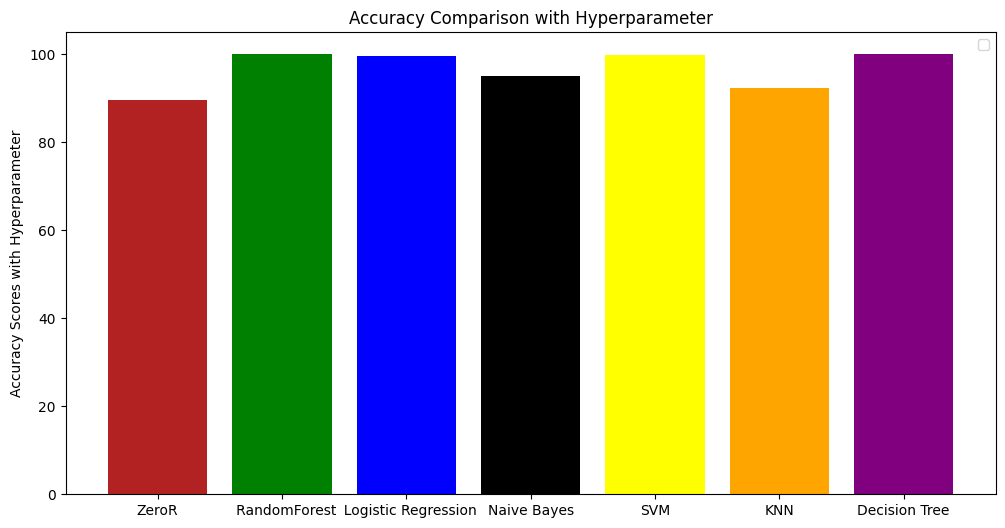

In [250]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
x1 = np.array(["ZeroR","   RandomForest ", "  Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree"])
y1 = np.array([ZRHypeTrainAccuracy*100,randomTrainHyperAccuracy*100,logisticTrainHyperAccuracy*100, gNBtrainHyperAccuracy*100, svmTrainHyperAccuracy*100,knTrainAccuracy*100,dtcHyperTrainAccuracy*100])
plt.ylabel('Accuracy Scores with Hyperparameter')
plt.title('Accuracy Comparison with Hyperparameter')
plt.bar(x1,y1,color=['firebrick', 'green','blue','black','yellow','orange','purple'])
plt.legend()
plt.show()

Comparision without Hyperparameter

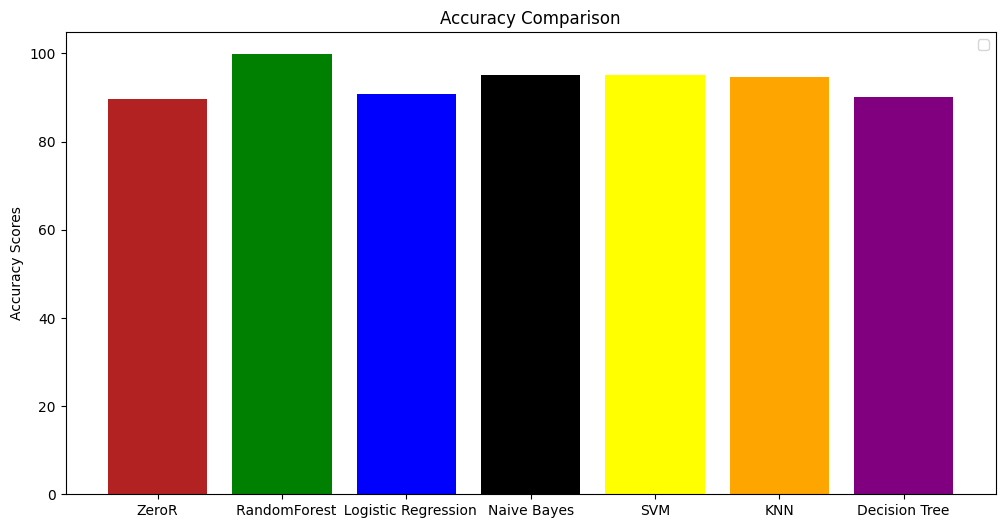

In [251]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
x1 = np.array(["ZeroR","   RandomForest ", "  Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree"])
y1 = np.array([zeroRTrainAccuracy*100,randomTrainAccuracy*100,logisticTrainAccuracy*100, gNBtrainAccuracy*100, svmTrainAccuracy*100,knHyperTrainAccuracy*100,dtcTrainAccuracy*100])
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'green','blue','black','yellow','orange','purple'])
plt.legend()
plt.show()

Algorithm Test Train Comparision without Hyperparameter

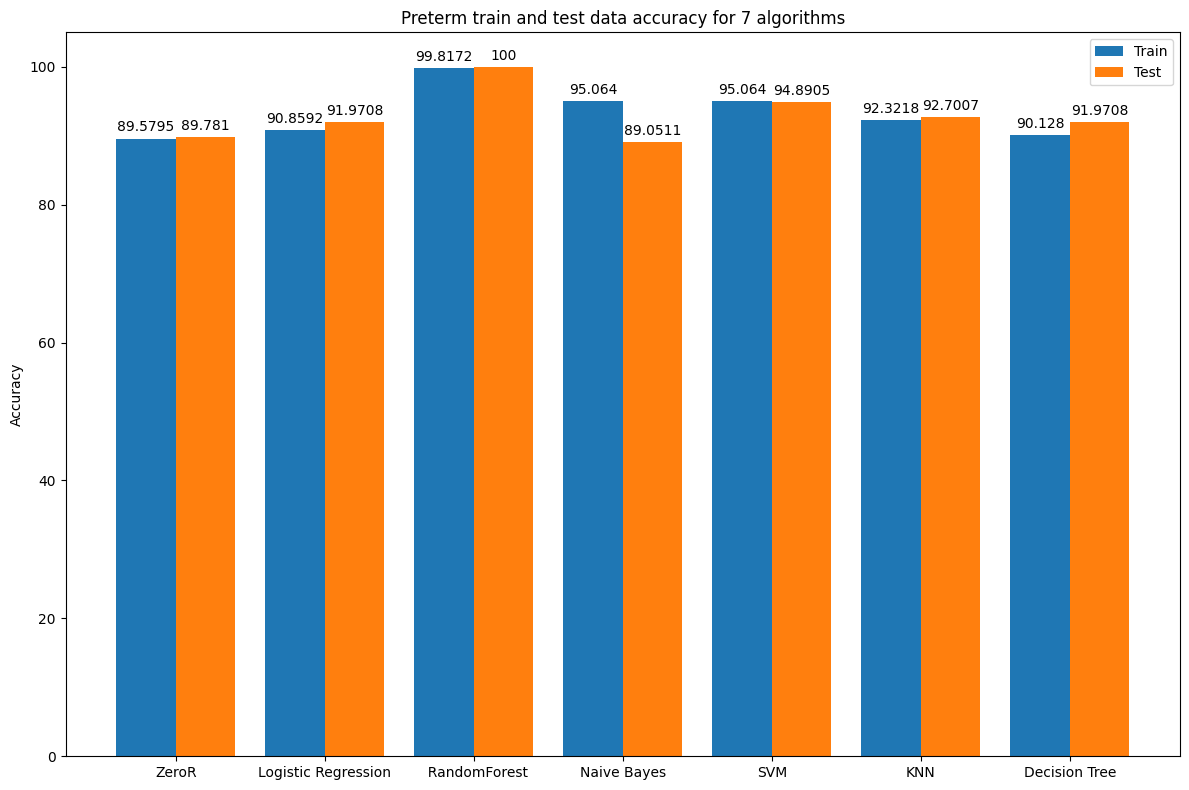

In [252]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["ZeroR","Logistic Regression", "  RandomForest","Naive Bayes","SVM","KNN","Decision Tree"]
train = [zeroRTrainAccuracy*100,logisticTrainAccuracy*100, randomTrainAccuracy*100, gNBtrainAccuracy*100, svmTrainAccuracy*100, knTrainAccuracy*100,dtcTrainAccuracy*100]
test = [zeroRTestAccuracy*100,logisticTestAccuracy*100, randomTestAccuracy*100, gNBtestAccuracy*100, svmTestAccuracy*100, knTestAccuracy*100,dtcTestAccuracy*100]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Preterm train and test data accuracy for 7 algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Algorithm Test Train Comparision with Hyperparameter

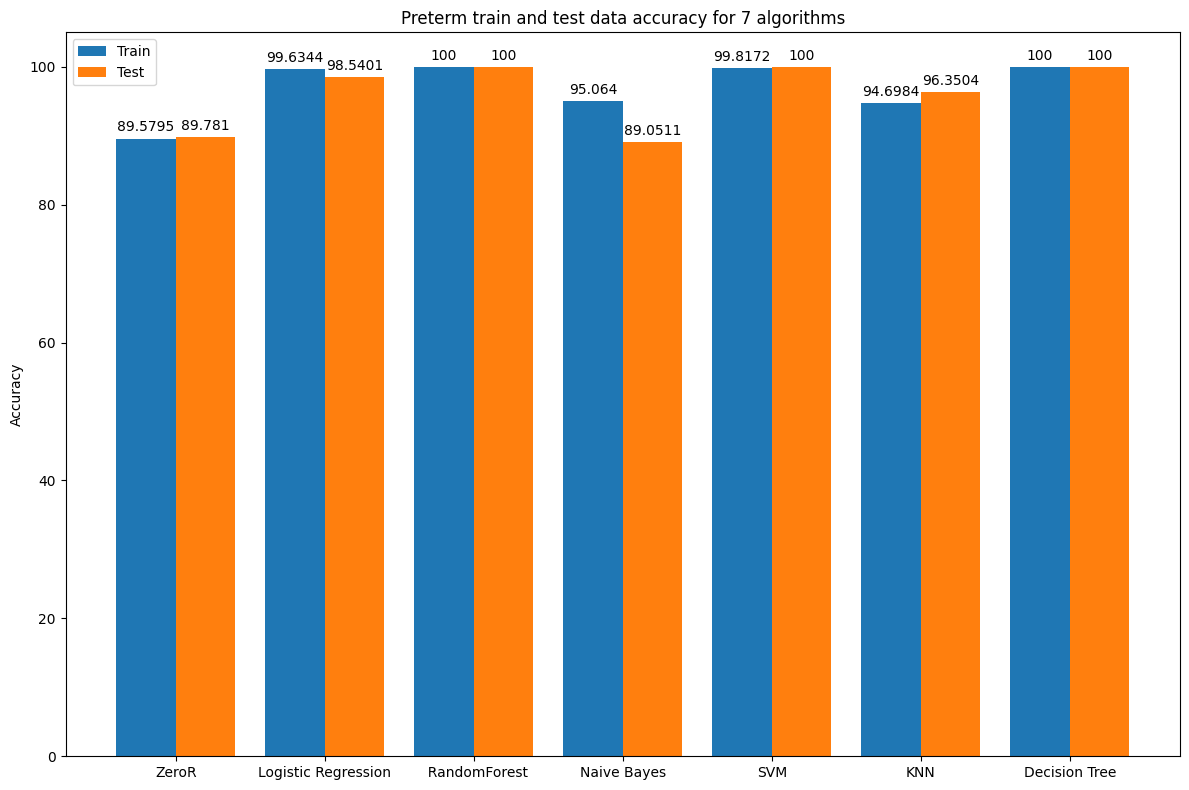

In [253]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["ZeroR","Logistic Regression", "  RandomForest","Naive Bayes","SVM","KNN","Decision Tree"]
train = [ZRHypeTrainAccuracy*100,logisticTrainHyperAccuracy*100, randomTrainHyperAccuracy*100, gNBtrainHyperAccuracy*100, svmTrainHyperAccuracy*100, knHyperTrainAccuracy*100,dtcHyperTrainAccuracy*100]
test = [ZRHypeTestAccuracy*100,logisticTestHyperAccuracy*100, randomTestHyperAccuracy*100, gNBtestHyperAccuracy*100, svmTestHyperAccuracy*100, knHyperTestAccuracy*100,dtcHyperTestAccuracy*100]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Preterm train and test data accuracy for 7 algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Performance Analysis**

ROC Before Hyper-tuning



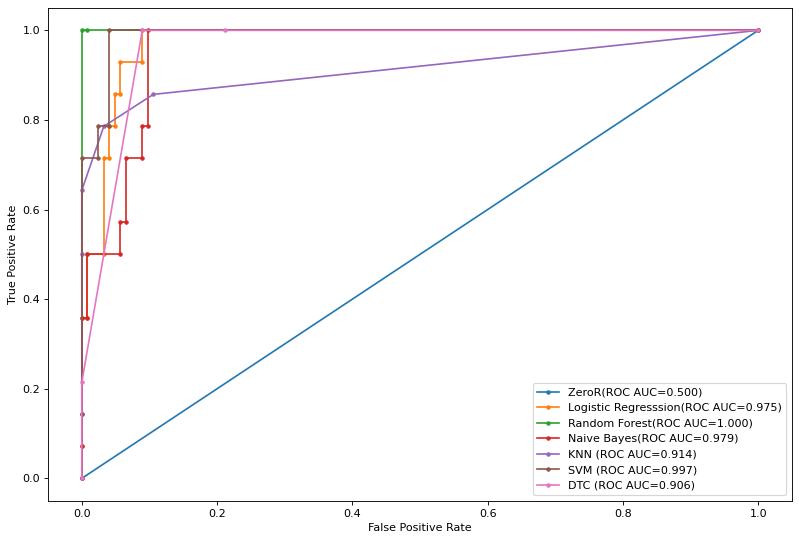

In [256]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
pyplot.plot(zr_fpr, zr_tpr, marker='.', label='ZeroR(ROC AUC=%.3f)' % (zr_auc))
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc))
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc))
pyplot.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes(ROC AUC=%.3f)' % (nb_auc))
pyplot.plot(kn_fpr_af, kn_tpr_af, marker='.', label='KNN (ROC AUC=%.3f)' % (knn_auc_af))
pyplot.plot(sb_fpr, sb_tpr, marker='.', label='SVM (ROC AUC=%.3f)' % (sb_auc))
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='DTC (ROC AUC=%.3f)' % (dtc_auc))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**ROC After Hyper-tuning**

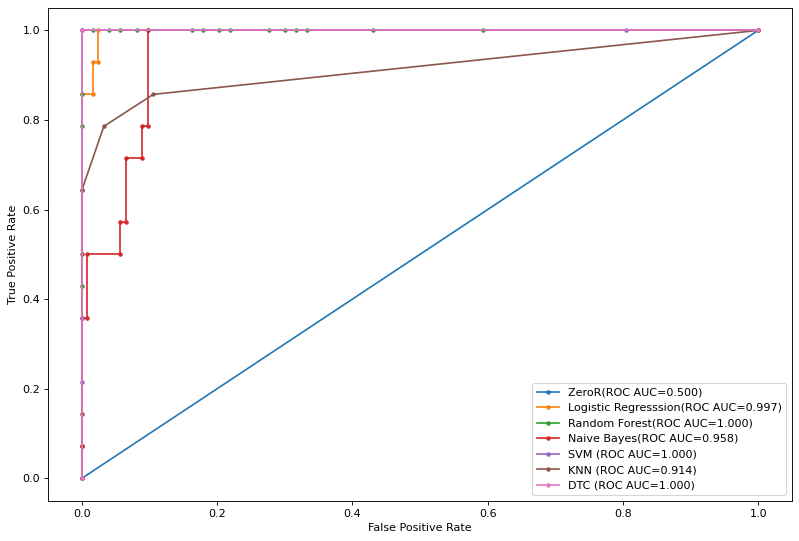

In [146]:
figure(figsize=(12, 8), dpi=80)
pyplot.plot(zr_fpr_af, zr_tpr_af, marker='.', label='ZeroR(ROC AUC=%.3f)' % (zr_auc_af))
pyplot.plot(lr_fpr_af, lr_tpr_af, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc_af))
pyplot.plot(rf_fpr_af, rf_tpr_af, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc_af))
pyplot.plot(nb_fpr_af, nb_tpr_af, marker='.', label='Naive Bayes(ROC AUC=%.3f)' % (nb_auc_af))
pyplot.plot(sb_fpr_af, sb_tpr_af, marker='.', label='SVM (ROC AUC=%.3f)' % (sb_auc_af))
pyplot.plot(kn_fpr_af, kn_tpr_af, marker='.', label='KNN (ROC AUC=%.3f)' % (knn_auc_af))
pyplot.plot(dtc_fpr_af, dtc_tpr_af, marker='.', label='DTC (ROC AUC=%.3f)' % (dtc_auc_af))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Classification Report**

Without Hyperparameter

In [257]:
from sklearn.metrics import classification_report
print("TEST")
print("ZeroR")
print(classification_report(y_test,ZeroRpred))
print("Logistic Regration")
print(classification_report(y_test,Logpred))
print("Random Forest")
print(classification_report(y_test,Randompred))
print("Naive Bayes")
print(classification_report(y_test,gNBpred))
print("SVM")
print(classification_report(y_test,SVMpred))
print("KNN")
print(classification_report(y_test,KNNpred))
print("Decision Tree")
print(classification_report(y_test,DTCpred))

print("TRAIN")
print("ZeroR")
print(classification_report(y_train,ZeroRpredTrain))
print("Logistic Regration")
print(classification_report(y_train,LogpredTrain))
print("Random Forest")
print(classification_report(y_train,RandompredTrain))
print("Naive Bayes")
print(classification_report(y_train,gNBpredTrain))
print("SVM")
print(classification_report(y_train,SVMpredTrain))
print("KNN")
print(classification_report(y_train,KNNpredTrain))
print("Decision Tree")
print(classification_report(y_train,DTpredTrain))

TEST
ZeroR
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       123
           1       0.00      0.00      0.00        14

    accuracy                           0.90       137
   macro avg       0.45      0.50      0.47       137
weighted avg       0.81      0.90      0.85       137

Logistic Regration
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       123
           1       1.00      0.21      0.35        14

    accuracy                           0.92       137
   macro avg       0.96      0.61      0.66       137
weighted avg       0.93      0.92      0.90       137

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        14

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**With HyperParameter**

In [258]:
from sklearn.metrics import classification_report
print("TEST")
print("ZeroR")
print(classification_report(y_test,ZeroRpredHyper))
print("Logistic Regration")
print(classification_report(y_test,LogpredHyper))
print("Random Forest")
print(classification_report(y_test,RandompredHyper))
print("Naive Bayes")
print(classification_report(y_test,gNBpredHyper))
print("SVM")
print(classification_report(y_test,SVMpredHyper))
print("KNN")
print(classification_report(y_test,KNNpredHyper))
print("Decision Tree")
print(classification_report(y_test,DTpredHyper))

print("TRAIN")
print("ZeroR")
print(classification_report(y_train,ZeroRpredTrainHyper))
print("Logistic Regration")
print(classification_report(y_train,LogpredTrainHyper))
print("Random Forest")
print(classification_report(y_train,RandompredTrainHyper))
print("Naive Bayes")
print(classification_report(y_train,gNBpredTrainHyper))
print("SVM")
print(classification_report(y_train,SVMpredTrainHyper))
print("KNN")
print(classification_report(y_train,KNNpredTrainHyper))
print("Decision Tree")
print(classification_report(y_train,DTpredTrainHyper))

TEST
ZeroR
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       123
           1       0.00      0.00      0.00        14

    accuracy                           0.90       137
   macro avg       0.45      0.50      0.47       137
weighted avg       0.81      0.90      0.85       137

Logistic Regration
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.86      0.92        14

    accuracy                           0.99       137
   macro avg       0.99      0.93      0.96       137
weighted avg       0.99      0.99      0.98       137

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        14

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif